In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.ops import unary_union
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [3]:
###Carregar shapefile
shapefile_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\MT_Municipios_2022\MT_Municipios_2022.shp"
municipalities = gpd.read_file(shapefile_path)

In [5]:
# Lista de municípios para filtrar
municipios_filtrados = [
    "Cáceres", "Primavera do Leste", "Rondonópolis", "Sinop", "Sorriso", 
    "Guarantã do Norte", "Matupá", "Peixoto de Azevedo", "Terra Nova do Norte", 
    "Nova Santa Helena", "Itaúba", "Lucas do Rio Verde", "Nova Mutum",
    "Barra do Garças", "Campo Verde"
]

# Filtrando os municípios
filtered_municipalities = municipalities[municipalities["NM_MUN"].isin(municipios_filtrados)]

In [39]:
# Caminho para o shapefile das rodovias
shapefile_path_rodovias = r"C:\\Users\\daves\\OneDrive\\Pessoal\\Acadêmico\\Mestrado\\Dissertação - Execução\\Análises\\Rodovias\\SNV_202410A.shp"
rodovias = gpd.read_file(shapefile_path_rodovias)

# Filtrar as rodovias com a coluna vl_br igual a 070 ou 163 e sg_uf igual a MT
filtered_rodovias_070 = rodovias[(rodovias["vl_br"] == "070") & (rodovias["sg_uf"] == "MT")]
filtered_rodovias_163 = rodovias[(rodovias["vl_br"] == "163") & (rodovias["sg_uf"] == "MT")]

In [40]:
# Combinar os DataFrames filtrados
filtered_highways_MT = pd.concat([filtered_rodovias_070, filtered_rodovias_163])

# Agrupar por vl_br
grouped_highways = filtered_highways_MT.groupby("vl_br")

In [45]:
#Combine geometries
def combine_geometries(geometries):
    return unary_union(geometries)

# Exemplo de uso
# Suponha que `filtered_highways_MT` seja um GeoDataFrame com a coluna 'geometry'
combined_geometry = combine_geometries(filtered_highways_MT['geometry'])

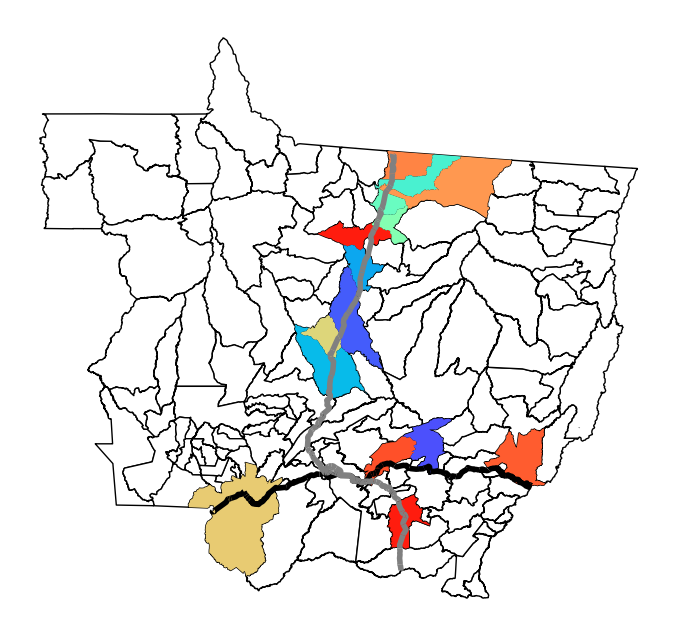

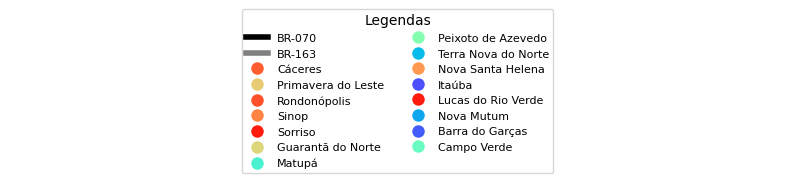

In [63]:
# Configurar o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Plotar os municípios
municipalities.plot(ax=ax, color='white', edgecolor='black', label='Municípios')

# Plotar os municípios filtrados com cores aleatórias
for i, municipio in enumerate(filtered_municipalities.geometry):
    gpd.GeoSeries([municipio]).plot(ax=ax, color=colors[i], label=municipios_filtrados[i])

# Plotar as rodovias filtradas com cores definidas
for i, geometry in enumerate(filtered_highways_MT.geometry):
    if filtered_highways_MT.iloc[i]['vl_br'] == '070':
        color = 'black'
        label = 'BR-070'
    elif filtered_highways_MT.iloc[i]['vl_br'] == '163':
        color = 'gray'
        label = 'BR-163'
    else:
        color = combined_colors[i % len(combined_colors)]
        label = None
    gpd.GeoSeries([geometry]).plot(ax=ax, color=color, linewidth=4, label=label)

# Remover eixos e grades
ax.set_axis_off()

# Exibir o gráfico
plt.show()

# Configurar a legenda para as rodovias e municípios
fig, ax_leg = plt.subplots(figsize=(10, 2))
highway_labels = {'BR-070': 'black', 'BR-163': 'gray'}
highway_handles = [plt.Line2D([0], [0], color=color, linewidth=4) for color in highway_labels.values()]
municipality_handles = [plt.Line2D([0], [0], color='white', marker='o', markerfacecolor=color, markersize=10) for color in colors[:len(filtered_municipalities)]]
municipality_labels = municipios_filtrados

# Adicionar as legendas das rodovias e municípios
ax_leg.legend(highway_handles + municipality_handles, list(highway_labels.keys()) + municipality_labels, loc='center', fontsize=8, title='Legendas', ncol=2)

# Remover eixos e grades da legenda
ax_leg.set_axis_off()

# Exibir a legenda
plt.show()